<a href="https://colab.research.google.com/github/marinacer/IA048/blob/main/flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS flower dataset**


Is a multivariate data set witch consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [203]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
import sklearn.metrics as sk

In [204]:
# open the csv file to dataframe
df = pd.read_csv('IRIS.csv')
df.head()

X = df.drop('species',axis = 1)
y = df.species

In [205]:
# label encoding Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2
label = preprocessing.LabelEncoder()
label.fit(y)
y = label.transform(y)

In [206]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Análise da distribuição dos dados**


In [207]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

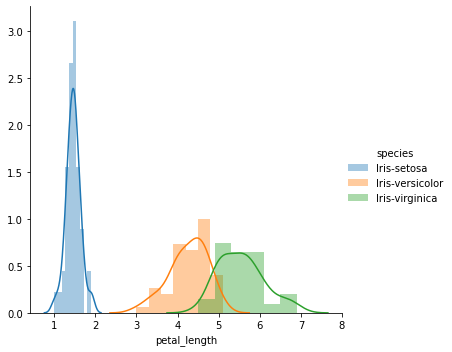

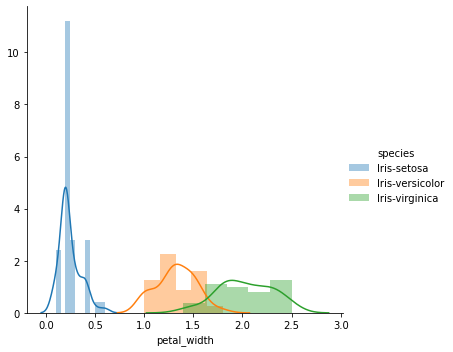

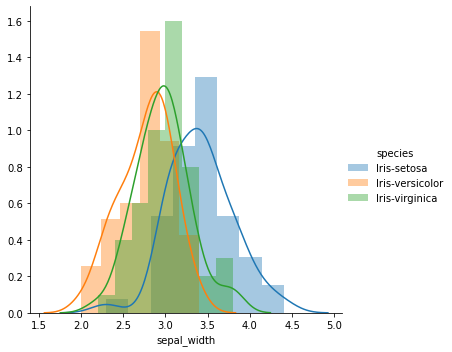

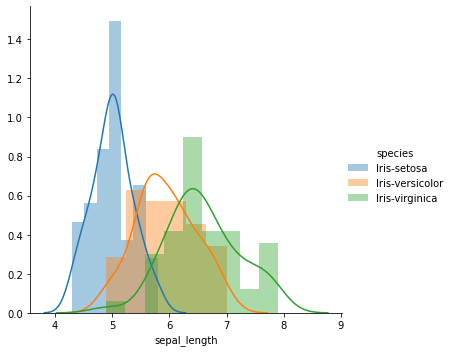

In [209]:
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_length").add_legend();
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"petal_width").add_legend();
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"sepal_width").add_legend();
sns.FacetGrid(df,hue="species",height=5).map(sns.distplot,"sepal_length").add_legend();

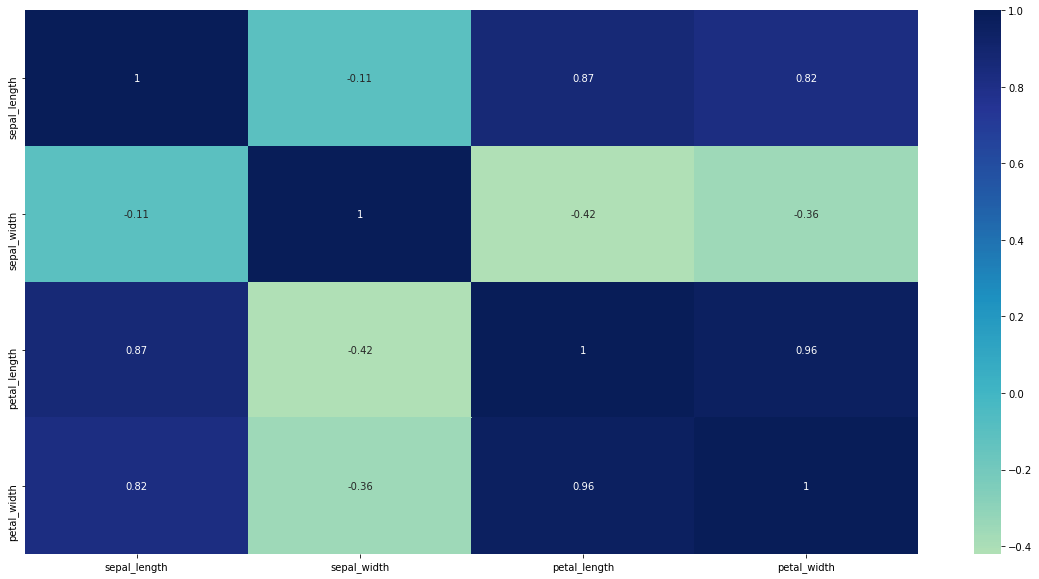

In [210]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, ax=ax,cmap="YlGnBu", center = 0)
plt.show()

Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

reg = LogisticRegression(fit_intercept=True).fit(Xtrain,ytrain)
ypred = reg.predict(Xtest)
print(accuracy_score(ytest, ypred))

1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


K-means


In [195]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit(Xtrain)
y_kmeans = kmeans.predict(Xtest)

In [196]:
cmatrix2softmax = sk.confusion_matrix(ytest,y_kmeans)
print(cmatrix2softmax)

[[11  0  0]
 [ 0 13  0]
 [ 0  3  3]]


KNN


In [163]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 4)
neigh.fit(Xtrain, ytrain)
y_pred_knn = neigh.predict(Xtest)

In [164]:
print(sk.confusion_matrix(ytest,y_pred_knn))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


SVM

In [217]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(Xtrain, ytrain)
y_svc = clf.predict(Xtest)

In [218]:
print(sk.confusion_matrix(ytest,y_svc))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
